In [68]:
# import dependency
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set(style="ticks", color_codes=True)

import numpy.random as rnd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


#### This is the tech challenge for BDI in October 2019

## Overview

##### Background

 

There are three main ways to buy a house in Korea.

The 1st way is to choose appropriate apartment through the real estate agents or

the 2nd is to buy an apartment from the constructor.

The 3rd way is to use the real estate auctions.

 

In general, Korean feel difficult it and they think that they cannot even begin to get started.

They are worried that if they make a reckless move without knowing the laws related to the analysis of rights and related to the laws,

they could lose their seed money.

 

Is the real estate auction really difficult and dangerous?

 

Yoon Soohyun(39 old) author of “the 365-month rent account”,

She said in an interview in the Hankook Daily(Korea newspaper) “It is just a misunderstanding and prejudice.”

 

The author argues that the more seed money is lacking, the more we should find a way at auction. 

- An excerpt from the Hankook Ilbo(Korea Newspaper).

 Challenge auction with seed money of 10 million won( 1130.56 won per 1$)... The Monthly Rent rich woman in only Three Years.

http://www.hankookilbo.com/News/Read/201804170416692333

 

Recently, various real estate related financial products such as real estate funds are actively being developed based on diverse data,

and expertise such as the development of high-yield investment products, trust in real estate investment,

evaluation of profitability and management of data is required.

 

The data for this contest was provided by a company that specializes in information services related to real estate auctions.
Infocare Auction(http://www.infocare.co.kr)

 

We hope many people will be interested in the data on apartment auction,

participate in the competition and realize your dream of own house.

 

##### Description

 

Existing financial institutions have conducted a review based on FICO scores and collateral oriented. On the other side,

The Korean FinTech company, TOGETHER FUNDING, 

predicts winning bid price and aims to provide financial opportunities for top winning bidders with low credit scores or with little collateral.

 

Please make a model to predict the apartment hammer price at this competition.

Together, we determine whether to lend or not based on the hammer price.

The more accurate the model is, the less the loss.

 

Order of auction procedure

flow

 

https://pds.joins.com/news/component/brandnews/201106/08/kumsol_813655_OEC3Kx.jpg

 

##### Background

 

집을 사는 방법엔 크게 세 가지가 있다. 부동산 중개업소에서 적당한 부동산을 고르거나 청약통장으로 아파트 분양을 받는 게 일반적인 방법이다. 

세 번째 방법은 부동산 경매를 이용하는 것이다. 하지만 부동산 경매는 어려울 것이라고 지레 겁먹고 시작할 엄두조차 내지 못하는 경우가 대부분이다. 

권리 분석과 관련 법규도 잘 모르는 상태에서 어설프게 나섰다간 오히려 종잣돈을 까먹을 수 있다는 우려 때문이다. 정말 부동산 경매는 어렵고 위험하기만 한 걸까. 

‘365 월세통장’의 저자 윤수현(39)씨는 지난10일 한국일보와의 인터뷰에서 “흔히 사람들은 경매에 대해 ‘어렵고 위험하다’고 말하는데 이는 경매에 대한 오해이자 편견일 뿐”이라고 강조했다.

 특히 종잣돈이 없을수록 경매에서 길을 찾아야 한다는것이 저자의 주장이다. -한국일보 인용

종잣돈 1000만원 들고 경매 도전…3년만에 ‘월세 부자’
http://www.hankookilbo.com/News/Read/201804170416692333
 

최근에는 다양한 데이터를 기반으로 부동산펀드 등 다양한 부동산 관련 금융 상품 개발이 활발히 개발되고 있으며, 

고수익 투자상품의 개발 및 부동산 투자신탁 등 전문성과 합리적인 Valuation, 수익방식에 의한 평가, 전문적인 자산관리 등 데이터 기반의 기술이 필요합니다.

 
이번 대회는 13년간 부동산 경매관련 정보서비스 전문 기업을 운영하는
 (주)인포케어옥션(http://www.infocare.co.kr)에서 유료 데이터를 제공하여 주셨습니다. 
많은 분들이 아파트경매 데이터에 관심을 가지고 대회 참여도 하시고 분석을 통해 내집 마련의 꿈을 이루기를 희망합니다.
 

##### description

 

기존의 금융기관은 일반적으로 경매 낙찰인 대출 시 신용점수 또는 담보물 위주의 평가를 진행합니다. 

 

반면, 한국의 핀테크 기업인 투게더펀딩(TOGETHER FUNDING)은 낙찰가를 예측하여 신용 점수가 낮거나 담보를 가지지 못하는 우수 낙찰인들에게 금융 기회를 제공하려 합니다.

 

이번 대회에서 아파트 경매가를 예측하는 모델을 만들어주세요. 투게더펀딩에서는 낙찰가를 기반으로 대출 여부를 결정합니다. 모델이 정확할 수록 원금 손실이 줄어듭니다. 

 
##### 경매절차 순서도

https://pds.joins.com/news/component/brandnews/201106/08/kumsol_813655_OEC3Kx.jpg



#### Code book


Auction_master_train.csv

Auction_key

경매 아파트 고유 키값

Auction_class

경매구분 
강제경매 : 법원에 소송을 제기하여 판결을 얻은 후 집행권원에 따라 경매를 진행
임의경매 : 등기부등본 담보권(저당권, 가압류등)으로 경매를 진행 
http://www.xn--289al3wfvfg7fo3dqso.com/?c=35/164/169/168&where=subject%7Ctag&keyword=%EC%9E%84%EC%9D%98&uid=913
http://www.goodmorningcc.com/news/articleView.html?idxno=50150

Bid_class

입찰구분(일반/개별/일괄)

Claim_price

경매 신청인의 청구 금액

Appraisal_company

감정사

Appraisal_date

감정일자

Auction_count

총경매횟수

Auction_miscarriage_count

총유찰횟수

Total_land_gross_area

총토지전체면적(㎡)

Total_land_real_area

총토지실면적(㎡)

Total_land_auction_area

총토지경매면적(㎡)

Total_building_area

총건물면적(㎡)

Total_building_auction_area

총건물경매면적(㎡)

Total_appraisal_price

총감정가

Minimum_sales_price

최저매각가격, 입찰 시 입찰인이 최저로 제시해야만 하는 금액

First_auction_date

최초경매일

Final_auction_date

최종경매일

Final_result

최종결과

Creditor

채권자, 경매 신청인

addr_do

주소_시도

addr_si

주소_시군구

addr_dong

주소_읍면동

addr_li

주소_리

addr_san

주소_산번지 여부(Y/N)

addr_bunji1

주소_번지1

addr_bunji2

주소_번지2

addr_etc

주소_기타주소

Apartment_usage

건물(토지)의 대표 용도

Completion_date

준공일

Preserve_regist_date

보존등기일, 건물을 신축하고 처음으로 등기

Total_floor

총층수

Current_floor

현재층수

Specific

기타_특이사항

Share_auction_YorN

지분경매 여부(Y/N), 하나의 부동산이 전체가 아닌 일부만 경매가 진행 (하나의 부동산의 공유자가 지분으로 소유권을 가지고 있을 때 그중 일부 지분만 경매가 진행)

road_name

도로명주소_도로명

road_bunji1

도로명주소_번지1

road_bunji2

도로명주소_번지2

Close_date

종국일자

Close_result

종국결과, 낙찰과 배당의 차이 : 
경매 진행은 ①경매진행(낙찰) ▷ ②낙찰허가결정 ▷ ③대금납부 ▷ ④배당 후 종결 로 이뤄집니다. 낙찰자가 최고가로 입찰(①)해서 낙찰허가(②)를 받으면 대금납부기한 낙찰금을 입금(③)합니다. 법원은 납부된 낙찰금을 가지고 채권자에게 순위에 의한 배당(④)을 해주고 경매는 종결됩니다.

point.y

위도

point.x

경도

Hammer_price

낙찰가

 

Auction_result.csv

Auction_key

아파트 경매 물건 고유 키값

Auction_seq

키_Sequence

Auction_date

경매일자

Appraisal_price

감정가

Minimum_sales_price

최저매각가격, 입찰 시 응찰인은 최저매각가격 이상 제시

Auction_results

경매결과 
변경 : 특별한 사유로 인하여 지정된 경매일에 경매를 진행 할 수 없을 때 법원이 직권으로 경매일정을 변경하는 절차
유찰 : 경매일에 낙찰되지 않음
낙찰 : 최고가 입찰
대납 : 낙찰 후 낙찰허가결정이 나면 대금을 납부
배당 : 납부된 대금으로 채권자의 순위에 따라 돈을 배당 

낙찰과 배당의 차이 : 
경매 진행은 ①경매진행(낙찰) ▷ ②낙찰허가결정 ▷ ③대금납부 ▷ ④배당 후 종결 로 이뤄집니다. 낙찰자가 최고가로 입찰(①)해서 낙찰허가(②)를 받으면 대금납부기한 낙찰금을 입금(③)합니다. 법원은 납부된 낙찰금을 가지고 채권자에게 순위에 의한 배당(④)을 해주고 경매는 종결됩니다.

 

Auction_regist.csv

Auction_key

경매 아파트 고유 키값

Auction_seq

키_Sequence

Regstration_type

등기종류(토지, 건물, 집합) 
건물등기 : 일반부동산의 건물등기
토지등기 : 일반부동산의 토지등기
집합건물등기 : 아파트 등 집합건물의 등기
토지별도등기 : 집한건물은 토지와 건물이 일체가되어 거래되야하는데 건물을 짓기 전 토지에 저당권이 있을 경우 토지와 건물의 권리관계가 일치하지 않으므로 건물등기부에 “토지에 별도등기가 있다”는 표시를 하기위한 등기

Regstration_class

등기구분, 
가등기 : 본등기의 순위보전을 위하여 하는 예비등기
보전처분 : 다툼이 있는 권리를 보전하기 위하여 소송이 확정되기 전 까지 법원에서 명하는 잠정적인 처분
가압류, 가처분: 보전처분으로 금액에 대한 강제처분을 가압류, 행위에 대한 강제처분을 가처분이라고 함
소유이전, 이전: 계약등의 이유로 소유권이 이전
압류 : 국가기관이 강제로 채무자의 재산처분이나 권리행살등을 못하게 하는 것. 예)체납 세금으로 인한 압류
예고등기 : 등기원인의 무효 또는 취소등으로 등기가 말소 또는 회복의 소가 제기된 경우 이를 제3자에게 경고하기 위하여 하는 등기
임의, 강제 : 임의경매나 강제경매 신청시 이뤄지는 등기
임차권 : 임차권등기명령으로 인한 임차 등기
저당 : 일반적으로 채권자가 부동산을 담보로 돈을 빌려줄 때 부동산에 하는 등기
전세권 : 전세권자가 하는 등기
질권 : 채권자가 채권의 담보로 받은 담보물권

Regist_date

등기일, 토지 별도 등기인 경우 99999999 코드로 분류

Creditor

등기부등본에 등재된 채권자

Regist_price

등기금액, 등기부등본 상의 부동산을 담보로 한 차입금

 

Auction_rent.csv

Auctiuon_key

경매 아파트 고유 키값

Rent_class

임대차구분, 
전입 : (동사무소에)전입신고한 일자
점유 : 임대차기간이거나 실거주자가 있을 경우

Purpose_use

임차인의 임차 용도

Occupied_part

점유인의 점유부분

Rent_date

임차일자, 전입신고일, 점유일이 불확실할 시 11111111

Rent_deposit

임차금액(보증금)

Rent_monthly_price

임차금액(월세)

Specific

특이사항 
조사서상: 법원 직원이 현상조사서, 물건명세서 작성한 서류상의 기록



In [69]:
Auction_master_train = pd.read_csv('Auction_master_train.csv')

In [70]:
Auction_master_train.head()

Auction_key Auction_class Bid_class  Claim_price Appraisal_company  \
0         2687            임의        개별   1766037301              정명감정   
1         2577            임의        일반    152946867               희감정   
2         2197            임의        개별     11326510              혜림감정   
3         2642            임의        일반    183581724              신라감정   
4         1958            강제        일반     45887671              나라감정   

        Appraisal_date  Auction_count  Auction_miscarriage_count  \
0  2017-07-26 00:00:00              2                          1   
1  2016-09-12 00:00:00              2                          1   
2  2016-11-22 00:00:00              3                          2   
3  2016-12-13 00:00:00              2                          1   
4  2016-03-07 00:00:00              2                          1   

   Total_land_gross_area  Total_land_real_area  ...  Specific  \
0                12592.0                 37.35  ...       NaN   
1                42478.1                 18.76  ...       NaN   
2               149683.1                 71.00  ...       NaN   
3                24405.0                 32.98  ...       NaN   
4                  774.0                 45.18  ...       NaN   

   Share_auction_YorN   road_name  road_bunji1  road_bunji2  \
0                   N      해운대해변로         30.0          NaN   
1                   N      마린시티2로         33.0          NaN   
2                   N    모라로110번길         88.0          NaN   
3                   N  황령대로319번가길        110.0          NaN   
4                   N         오작로         51.0          NaN   

            Close_date Close_result    point.y     point.x Hammer_price  
0  2018-06-14 00:00:00           배당  35.162717  129.137048    760000000  
1  2017-03-30 00:00:00           배당  35.156633  129.145068    971889999  
2  2017-12-13 00:00:00           배당  35.184601  128.996765     93399999  
3  2017-12-27 00:00:00           배당  35.154180  129.089081    256899000  
4  2016-10-04 00:00:00           배당  35.099630  128.998874    158660000  

[5 rows x 41 columns]

In [71]:
Auction_master_train.columns

Index(['Auction_key', 'Auction_class', 'Bid_class', 'Claim_price',
       'Appraisal_company', 'Appraisal_date', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'First_auction_date',
       'Final_auction_date', 'Final_result', 'Creditor', 'addr_do', 'addr_si',
       'addr_dong', 'addr_li', 'addr_san', 'addr_bunji1', 'addr_bunji2',
       'addr_etc', 'Apartment_usage', 'Preserve_regist_date', 'Total_floor',
       'Current_floor', 'Specific', 'Share_auction_YorN', 'road_name',
       'road_bunji1', 'road_bunji2', 'Close_date', 'Close_result', 'point.y',
       'point.x', 'Hammer_price'],
      dtype='object')

In [72]:
Auction_master_train.columns.summary()

/home/kaysuh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'summary' is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


'Index: 41 entries, Auction_key to Hammer_price'

In [73]:
Auction_master_train.describe()

Auction_key   Claim_price  Auction_count  Auction_miscarriage_count  \
count  1933.000000  1.933000e+03    1933.000000                1933.000000   
mean   1380.271081  3.703908e+08       1.836006                   0.788412   
std     801.670470  1.337869e+09       0.938319                   0.831715   
min       1.000000  0.000000e+00       1.000000                   0.000000   
25%     691.000000  7.746112e+07       1.000000                   0.000000   
50%    1395.000000  1.728143e+08       2.000000                   1.000000   
75%    2062.000000  3.565089e+08       2.000000                   1.000000   
max    2762.000000  2.286481e+10      13.000000                   9.000000   

       Total_land_gross_area  Total_land_real_area  Total_land_auction_area  \
count           1.933000e+03           1933.000000              1933.000000   
mean            3.458714e+04             42.333802                41.310776   
std             9.442101e+04             65.274404                65.385900   
min             0.000000e+00              0.000000                 0.000000   
25%             2.997000e+03             25.870000                24.570000   
50%             1.424140e+04             37.510000                36.790000   
75%             4.140310e+04             51.790000                51.320000   
max             3.511936e+06           2665.840000              2665.840000   

       Total_building_area  Total_building_auction_area  \
count          1933.000000                  1933.000000   
mean             96.417693                    94.148810   
std             106.323240                   106.845985   
min               9.390000                     1.500000   
25%              61.520000                    59.970000   
50%              84.900000                    84.860000   
75%             114.940000                   114.850000   
max            4255.070000                  4255.070000   

       Total_appraisal_price  Minimum_sales_price  addr_bunji1  addr_bunji2  \
count           1.933000e+03         1.933000e+03  1929.000000   889.000000   
mean            4.973592e+08         4.155955e+08   601.952307    22.742407   
std             7.873851e+08         5.030312e+08   554.119824    67.000807   
min             4.285000e+06         4.285000e+06     1.000000     1.000000   
25%             2.090000e+08         1.750000e+08   189.000000     1.000000   
50%             3.600000e+08         3.120000e+08   482.000000     5.000000   
75%             5.720000e+08         4.864000e+08   834.000000    18.000000   
max             2.777500e+10         1.422080e+10  4937.000000  1414.000000   

       Total_floor  Current_floor  road_bunji1  road_bunji2      point.y  \
count  1933.000000    1933.000000  1909.000000   155.000000  1933.000000   
mean     16.980859       8.817900   127.441069    12.748387    36.698018   
std       9.509021       8.044644   188.394217    10.735663     1.150269   
min       3.000000       0.000000     1.000000     1.000000    35.051385   
25%      12.000000       3.000000    24.000000     5.000000    35.188590   
50%      15.000000       7.000000    57.000000     9.000000    37.500862   
75%      21.000000      12.000000   145.000000    17.500000    37.566116   
max      80.000000      65.000000  1716.000000    55.000000    37.685575   

           point.x  Hammer_price  
count  1933.000000  1.933000e+03  
mean    127.731667  4.726901e+08  
std       0.993055  5.574493e+08  
min     126.809393  6.303000e+06  
25%     126.959167  1.975550e+08  
50%     127.065003  3.544500e+08  
75%     129.018054  5.599000e+08  
max     129.255872  1.515100e+10

In [74]:
Auction_master_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

In [75]:
Auction_result = pd.read_csv('Auction_result.csv')

In [76]:
Auction_result.head()

Auction_key  Auction_seq         Auction_date  Appraisal_price  \
0            1            1  2011-06-21 00:00:00        313000000   
1            1            2  2011-12-13 00:00:00        313000000   
2            1            3  2016-05-17 00:00:00        298000000   
3            1            4  2016-06-21 00:00:00        298000000   
4            1            5  2016-07-26 00:00:00        298000000   

   Minimum_sales_price Auction_results  
0            313000000              변경  
1            313000000              변경  
2            298000000              유찰  
3            238400000              유찰  
4            190720000              유찰

In [77]:
Auction_regist = pd.read_csv('Auction_regist.csv')

In [78]:
Auction_regist.head()

Auction_key  Auction_seq Regist_type Regist_class  Regist_date   Creditor  \
0            1        10001      집합건물등기         소유이전     20050715    Private   
1            1        10002      집합건물등기       가압         20050914  푸른이상호저축은행   
2            1        10003      집합건물등기       가압         20051229    Private   
3            1        10004      집합건물등기       가압         20060428    Private   
4            1        10005      집합건물등기        가처분       20070410    Private   

   Regist_price  
0             0  
1     860547945  
2     189800000  
3    1346000000  
4             0

In [79]:
Auction_rent = pd.read_csv('Auction_rent.csv')

In [80]:
Auction_rent.head()

Auctiuon_key Rent_class Purpose_use Occupied_part            Rent_date  \
0             1     전입              주거        201호전부  2007-09-14 00:00:00   
1             2     전입              주거            방3  2008-06-27 00:00:00   
2             2     점유              주거          202호  1111-11-11 00:00:00   
3             3     점유              주거          201호  1111-11-11 00:00:00   
4             3     전입              주거          201호  2007-01-08 00:00:00   

   Rent_deposit  Rent_monthly_price                       Specific  
0      53000000              250000  점유: 2007.09.14-\r\n조사서상:5300만  
1      60000000                   0                점유: 2005.09.12-  
2             0                   0                           조사서상  
3             0                   0                           조사서상  
4             0                   0                           조사서상

In [81]:
Auction_master_test = pd.read_csv('Auction_master_test.csv')

In [82]:
Auction_master_test.head()

Auction_key Auction_class Bid_class  Claim_price Appraisal_company  \
0         1778            강제        개별   1087000000              대한감정   
1         1779            강제        개별   1087000000              대한감정   
2         1784            강제        개별   1087000000              대한감정   
3         1786            강제        개별   1087000000              대한감정   
4         1790            강제        개별   1087000000              대한감정   

        Appraisal_date  Auction_count  Auction_miscarriage_count  \
0  2012-06-11 00:00:00              7                          6   
1  2012-06-11 00:00:00              6                          5   
2  2012-06-11 00:00:00              7                          6   
3  2012-06-11 00:00:00              7                          6   
4  2012-06-11 00:00:00              7                          6   

   Total_land_gross_area  Total_land_real_area  ...             Specific  \
0                  532.0                 18.22  ...   **1차감정:235,000,000   
1                  532.0                 16.65  ...   **1차감정:220,000,000   
2                  532.0                 18.22  ...  **1차감정: 240,000,000   
3                  532.0                 18.22  ...  **1차감정: 240,000,000   
4                  532.0                 18.22  ...  **1차감정: 240,000,000   

   Share_auction_YorN  road_name  road_bunji1  road_bunji2  \
0                   N          0          NaN          NaN   
1                   N          0          NaN          NaN   
2                   N          0          NaN          NaN   
3                   N          0          NaN          NaN   
4                   N          0          NaN          NaN   

            Close_date Close_result    point.y     point.x Hammer_price  
0  2017-06-29 00:00:00           배당  35.201112  129.088687            0  
1  2017-06-29 00:00:00           배당  35.201112  129.088687            0  
2  2017-06-29 00:00:00           배당  35.201112  129.088687            0  
3  2017-06-29 00:00:00           배당  35.201112  129.088687            0  
4  2017-06-29 00:00:00           배당  35.201112  129.088687            0  

[5 rows x 41 columns]

## EDA

Text(0.5, 1.0, 'Distribution of Auction_count')

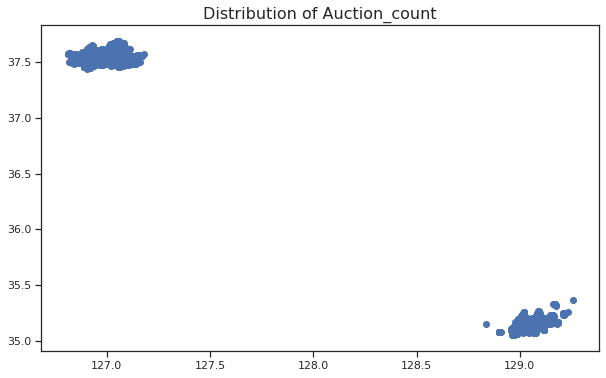

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(x=Auction_master_train['point.x'],y=Auction_master_train['point.y'])
plt.title("Distribution of Auction_count",size=16)

Text(0.5, 1.0, 'Distribution of Auction_count')

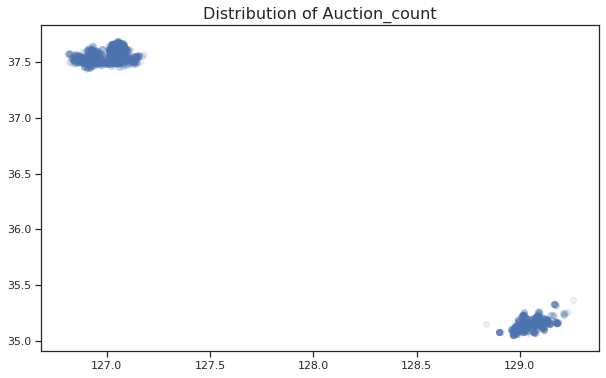

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(x=Auction_master_train['point.x'],y=Auction_master_train['point.y'],alpha=0.1)
plt.title("Distribution of Auction_count",size=16)

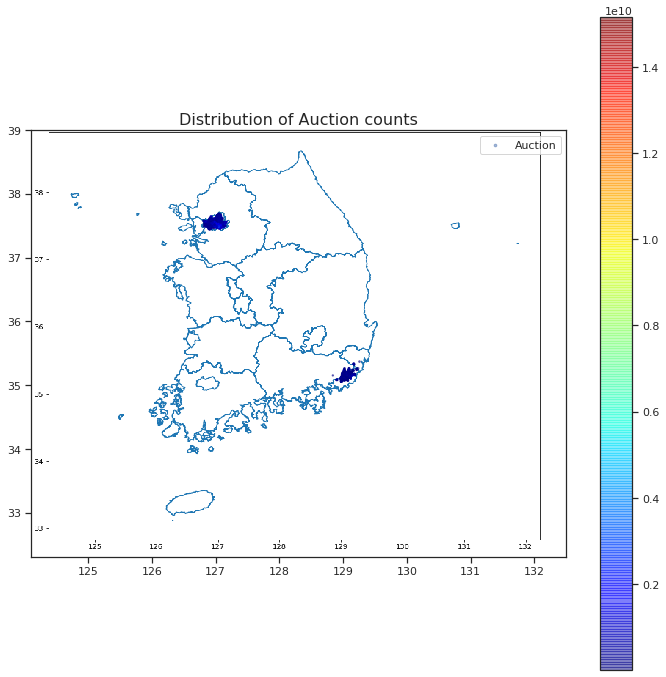

In [54]:
plt.figure(figsize=(12,12))
img=plt.imread('map3.PNG')
plt.imshow(img,zorder=0,extent=[124.1,132.5,32.3,39])

plt.scatter(x=Auction_master_train['point.x'],y=Auction_master_train['point.y'],alpha=0.5,s=Auction_master_train['Auction_count'],c=Auction_master_train['Hammer_price'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Auction')
plt.colorbar()
plt.title("Distribution of Auction counts", size=16)
plt.legend()

### 예측 타겟 주택 공간 정보

In [19]:
Auction_master_test['Auction_count'] = Auction_master_test['Auction_count'].astype('float64')

In [20]:
Auction_master_train['Auction_count'] = Auction_master_train['Auction_count'].astype('float64')

In [21]:
import folium

map_osm = folium.Map(location=[35.166804,129.083479],zoom_start=11)

for item in Auction_master_test.index:
    lat = Auction_master_test.loc[item,'point.y']
    long = Auction_master_test.loc[item,'point.x']
    #item = item.strip()
    folium.CircleMarker([lat,long],
                        radius=Auction_master_test.loc[item,'Auction_count'],
                        popup =Auction_master_test.loc[item,'addr_dong'],
                        color = 'Red',
                        fill = True).add_to(map_osm)

map_osm

In [22]:
import folium

map_osm2 = folium.Map(location=[35.166804,129.083479],zoom_start=8)

for item in Auction_master_train.index:
    lat = Auction_master_train.loc[item,'point.y']
    long = Auction_master_train.loc[item,'point.x']
    #item = item.strip()
    folium.CircleMarker([lat,long],
                        radius=Auction_master_train.loc[item,'Auction_count'],
                        popup =Auction_master_train.loc[item,'addr_dong'],
                        color = 'Red',
                        fill = True).add_to(map_osm2)

map_osm2

In [47]:
map_osm.save('/home/kaysuh/busan2.html')

In [41]:
map_osm.save('/home/kaysuh/busan.html')


In [108]:
import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
data

array([ -61, -115, -158, -215, -147,  -51,   -1,  -47,   45,  119,   95,
         56,  -13,   62,  102,   53,  -40,  -62,   10,  -70, -137, -126,
        -34,  -66,   -7, -103, -171, -111, -184, -230, -315, -236, -278,
       -282, -249, -287, -207, -278, -257, -315, -394, -314, -315, -313,
       -288, -385, -448, -360, -391, -419])

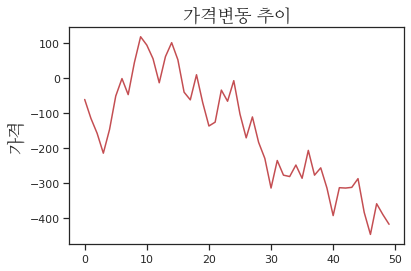

In [109]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

plt.plot(range(50), data, 'r')
plt.title('가격변동 추이', fontproperties=fontprop)
plt.ylabel('가격', fontproperties=fontprop)
plt.show()

 


In [110]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

fontname = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf' #plt.font_manager.get_fontconfig_fonts()[0]
fontname = font_manager.FontProperties(fname=fontname).get_name()
plt.style.use('seaborn-white')
rc('font', family=fontname)

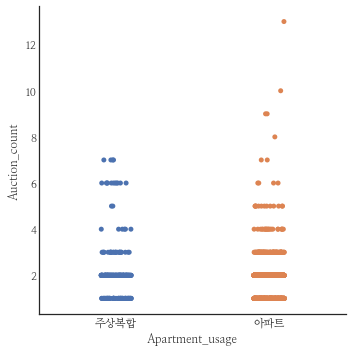

In [34]:
kind="box"
sns.catplot(x="Apartment_usage", y="Auction_count", data=Auction_master_train);

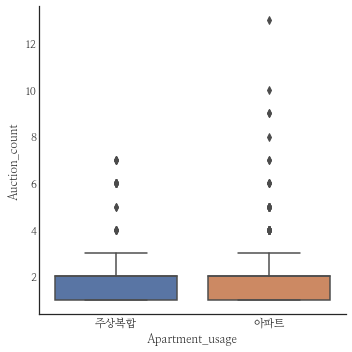

In [49]:
sns.catplot(x="Apartment_usage", y="Auction_count",kind='box', data=Auction_master_train);

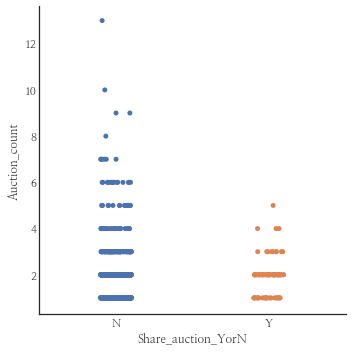

In [41]:
sns.catplot(x="Share_auction_YorN", y="Auction_count", order=["N", "Y"], data=Auction_master_train);

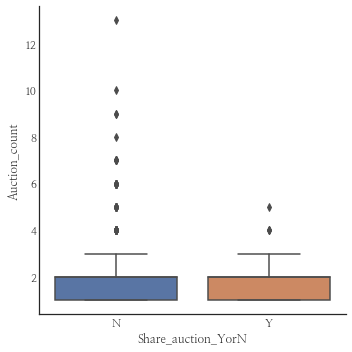

In [50]:
sns.catplot(x="Share_auction_YorN", y="Auction_count", order=["N", "Y"],kind='box', data=Auction_master_train);

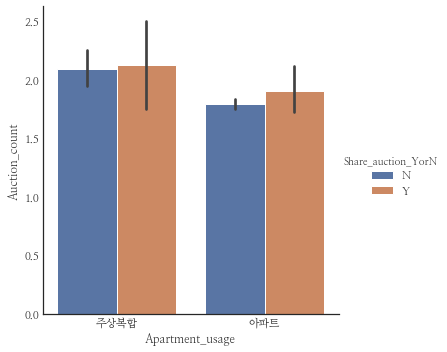

In [45]:
sns.catplot(x="Apartment_usage", y="Auction_count", hue="Share_auction_YorN", kind="bar", data=Auction_master_train);

In [ ]:
plt.figure(figsize=(15,10))
boxplot = 

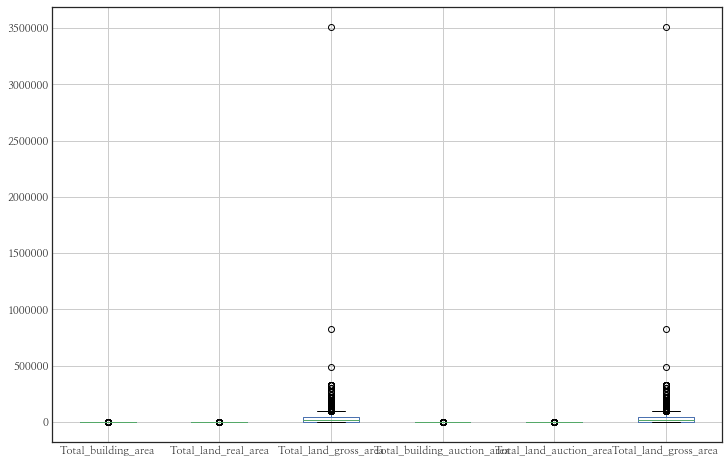

In [48]:
plt.figure(figsize=(12,8)) 
boxplot = Auction_master_train.boxplot(column=['Total_building_area','Total_land_real_area','Total_land_gross_area','Total_building_auction_area', 'Total_land_auction_area', 'Total_land_gross_area'])
plt.show()
 




In [19]:
columns=['Total_building_area','Total_land_real_area','Total_land_gross_area','Total_building_auction_area', 'Total_land_auction_area', 'Total_land_gross_area']


In [20]:
df = Auction_master_train[columns]


In [21]:
df.head()

Total_building_area  Total_land_real_area  Total_land_gross_area  \
0               181.77                 37.35                12592.0   
1               118.38                 18.76                42478.1   
2                49.94                 71.00               149683.1   
3                84.91                 32.98                24405.0   
4                84.96                 45.18                  774.0   

   Total_building_auction_area  Total_land_auction_area  Total_land_gross_area  
0                       181.77                    37.35                12592.0  
1                       118.38                    18.76                42478.1  
2                        49.94                    71.00               149683.1  
3                        84.91                    32.98                24405.0  
4                        84.96                    45.18                  774.0

### The predicted variable - Hammer price Skew & kurtosis analysis¶
The predicted variable is probably the most important variable, therefore it should be inspected throughly. 
It turns out models work better with symmetric gaussian distributions, therefore we want to get rid of the skewness by using log transformation. More on log transformation later 

Skew:
𝑠𝑘𝑒𝑤(𝑋)=𝐸[𝑋−𝜇𝜎]3
 
https://en.wikipedia.org/wiki/Skewness



Kurtosis:
𝑘𝑢𝑟𝑡𝑜𝑠𝑖𝑠(𝑋)=𝐸[(𝑋−𝜇𝜎)4]
 
https://en.wikipedia.org/wiki/Kurtosis 

Skewness: 11.178607
Kurtosis: 255.169951


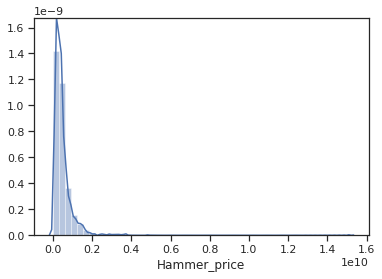

In [22]:
Auction_master_train['Hammer_price'].describe()
sns.distplot(Auction_master_train['Hammer_price'])
#skewness and kurtosis
print("Skewness: %f" % Auction_master_train['Hammer_price'].skew())
print("Kurtosis: %f" % Auction_master_train['Hammer_price'].kurt())

### Tansforming:
𝑌=𝑙𝑜𝑔(1+𝑋))
 
¶
Should correct for skew. 
A random example of a different log transformation


 mu = 472690128.41 and sigma = 557305108.22


 mu = 19.63 and sigma = 0.84



Text(0.5, 0.98, 'After transformation')

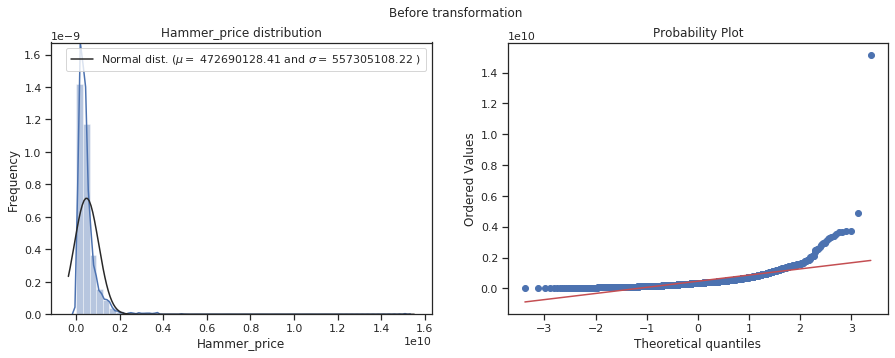

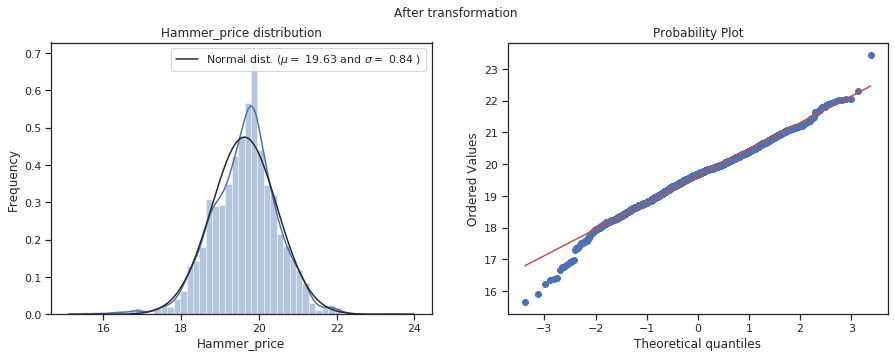

In [23]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Plot histogram and probability
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(Auction_master_train['Hammer_price'] , fit=norm);
(mu, sigma) = norm.fit(Auction_master_train['Hammer_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Hammer_price distribution')
plt.subplot(1,2,2)
res = stats.probplot(Auction_master_train['Hammer_price'], plot=plt)
plt.suptitle('Before transformation')

# Apply transformation
Auction_master_train.Hammer_price = np.log1p(Auction_master_train.Hammer_price)
# New prediction
y_train = Auction_master_train.Hammer_price.values
y_train_orig = Auction_master_train.Hammer_price


# Plot histogram and probability after transformation
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(Auction_master_train['Hammer_price'] , fit=norm);
(mu, sigma) = norm.fit(Auction_master_train['Hammer_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Hammer_price distribution')
plt.subplot(1,2,2)
res = stats.probplot(Auction_master_train['Hammer_price'], plot=plt)
plt.suptitle('After transformation')

#### Correlation among columns

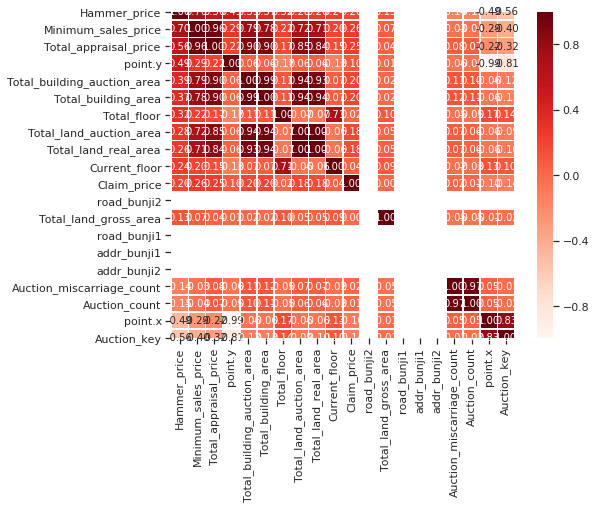

In [24]:

k=Auction_master_train.shape[1] 
corrmat = Auction_master_train.corr() 
cols = corrmat.nlargest(k, 'Hammer_price')['Hammer_price'].index 
cm = np.corrcoef(Auction_master_train[cols].values.T)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data = cm, annot=True, square=True, fmt = '.2f', linewidths=.5, cmap='Reds', 
            yticklabels = cols.values, xticklabels = cols.values)

Skewness: 31.234728
Kurtosis: 1197.317539


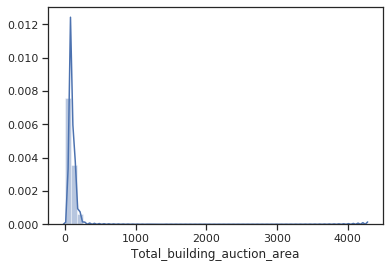

In [84]:
Auction_master_train['Total_building_auction_area'].describe()
sns.distplot(Auction_master_train['Total_building_auction_area'])
#skewness and kurtosis
print("Skewness: %f" % Auction_master_train['Total_building_auction_area'].skew())
print("Kurtosis: %f" % Auction_master_train['Total_building_auction_area'].kurt())

Skewness: 1.977065
Kurtosis: 7.481053


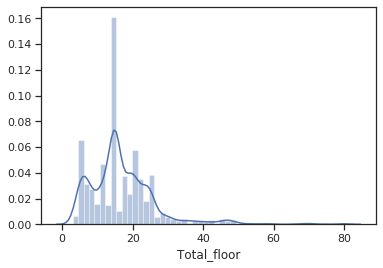

In [85]:
Auction_master_train['Total_floor'].describe()
sns.distplot(Auction_master_train['Total_floor'])
#skewness and kurtosis
print("Skewness: %f" % Auction_master_train['Total_floor'].skew())
print("Kurtosis: %f" % Auction_master_train['Total_floor'].kurt())

In [86]:
Auction_master_train['RF'] = Auction_master_train['Current_floor']/Auction_master_train['Total_floor']

In [87]:
Auction_master_train['RF'].value_counts()


1.000000    135
0.200000     81
0.333333     75
0.400000     73
0.600000     71
           ... 
0.205128      1
0.432432      1
0.433333      1
0.711111      1
0.563380      1
Name: RF, Length: 293, dtype: int64

In [88]:
target = ['RF','Total_floor', 'Current_floor', 'Apartment_usage', 'Total_building_auction_area', 'Total_land_auction_area', 'Total_land_gross_area', 'Share_auction_YorN']

In [89]:
features = Auction_master_train[target]

price = Auction_master_train['Hammer_price']

In [90]:
features.head()

RF  Total_floor  Current_floor Apartment_usage  \
0  0.111111           45              5            주상복합   
1  0.728571           70             51             아파트   
2  0.933333           15             14             아파트   
3  0.550000           20             11             아파트   
4  1.000000            7              7             아파트   

   Total_building_auction_area  Total_land_auction_area  \
0                       181.77                    37.35   
1                       118.38                    18.76   
2                        49.94                    71.00   
3                        84.91                    32.98   
4                        84.96                    45.18   

   Total_land_gross_area Share_auction_YorN  
0                12592.0                  N  
1                42478.1                  N  
2               149683.1                  N  
3                24405.0                  N  
4                  774.0                  N

In [91]:
price.head()

0    760000000
1    971889999
2     93399999
3    256899000
4    158660000
Name: Hammer_price, dtype: int64

### Preprocess Feature Columns¶
As you can see, there are several non-numeric columns that need to be converted! Many of them are simply yes/no, e.g. internet. These can be reasonably converted into 1/0 (binary) values.

Other columns, like Mjob and Fjob, have more than two values, and are known as categorical variables. The recommended way to handle such a column is to create as many columns as possible values (e.g. Fjob_teacher, Fjob_other, Fjob_services, etc.), and assign a 1 to one of them and 0 to all others.

These generated columns are sometimes called dummy variables, and we will use the pandas.get_dummies() function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [92]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['Y', 'N'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

df = preprocess_features(features)
print ("Processed feature columns ({} total features):\n{}".format(len(df.columns), list(df.columns)))

Processed feature columns (9 total features):
['RF', 'Total_floor', 'Current_floor', 'Apartment_usage_아파트', 'Apartment_usage_주상복합', 'Total_building_auction_area', 'Total_land_auction_area', 'Total_land_gross_area', 'Share_auction_YorN']


In [93]:
df.head()

RF  Total_floor  Current_floor  Apartment_usage_아파트  \
0  0.111111           45              5                    0   
1  0.728571           70             51                    1   
2  0.933333           15             14                    1   
3  0.550000           20             11                    1   
4  1.000000            7              7                    1   

   Apartment_usage_주상복합  Total_building_auction_area  Total_land_auction_area  \
0                     1                       181.77                    37.35   
1                     0                       118.38                    18.76   
2                     0                        49.94                    71.00   
3                     0                        84.91                    32.98   
4                     0                        84.96                    45.18   

   Total_land_gross_area  Share_auction_YorN  
0                12592.0                   0  
1                42478.1                   0  
2               149683.1                   0  
3                24405.0                   0  
4                  774.0                   0

In [95]:
df_for_model = df.copy()

In [98]:
for column in df :
    df[column] = np.log1p(df[column])
    
    print("%s -> Skewness: %f, Kurtosis: %f" %  (column,df[column].skew(), 
                                                 df[column].kurt()))

RF -> Skewness: -0.147790, Kurtosis: -1.199866
Total_floor -> Skewness: -0.201183, Kurtosis: 0.105805
Current_floor -> Skewness: 0.030488, Kurtosis: -0.551747
Apartment_usage_아파트 -> Skewness: -2.041016, Kurtosis: 2.162109
Apartment_usage_주상복합 -> Skewness: 2.037109, Kurtosis: 2.152344
Total_building_auction_area -> Skewness: -0.705025, Kurtosis: 4.970136
Total_land_auction_area -> Skewness: -1.967766, Kurtosis: 7.073889
Total_land_gross_area -> Skewness: -1.694864, Kurtosis: 4.697427
Share_auction_YorN -> Skewness: 4.641594, Kurtosis: 19.564638


In [103]:
df['Hammer_price'] = np.log1p(Auction_master_train['Hammer_price'])


/home/kaysuh/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


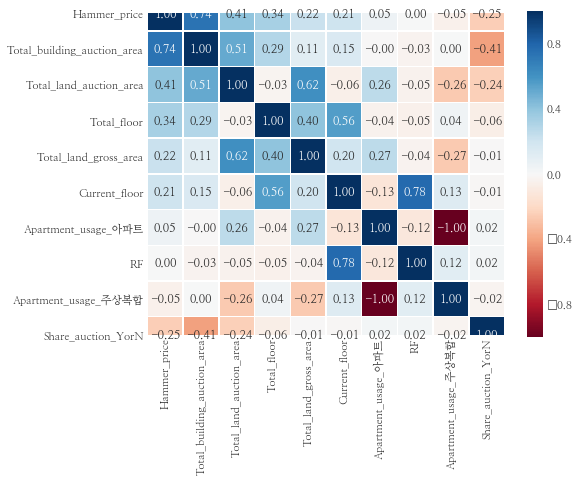

In [111]:

k=df.shape[1] 
corrmat = df.corr() 
cols = corrmat.nlargest(k, 'Hammer_price')['Hammer_price'].index 
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data = cm, annot=True, square=True, fmt = '.2f', linewidths=.5, cmap='RdBu', 
            yticklabels = cols.values, xticklabels = cols.values)

In [105]:
df.head()

RF  Total_floor  Current_floor  Apartment_usage_아파트  \
0  0.105361     3.828641       1.791759             0.000000   
1  0.547295     4.262680       3.951244             0.693359   
2  0.659246     2.772589       2.708050             0.693359   
3  0.438255     3.044522       2.484907             0.693359   
4  0.693147     2.079442       2.079442             0.693359   

   Apartment_usage_주상복합  Total_building_auction_area  Total_land_auction_area  \
0              0.693359                     5.208229                 3.646755   
1              0.000000                     4.782312                 2.983660   
2              0.000000                     3.930648                 4.276666   
3              0.000000                     4.453300                 3.525772   
4              0.000000                     4.453882                 3.832547   

   Total_land_gross_area  Share_auction_YorN  Hammer_price  
0               9.440896                 0.0     20.448829  
1              10.656767                 0.0     20.694753  
2              11.916282                 0.0     18.352402  
3              10.102584                 0.0     19.364194  
4               6.652863                 0.0     18.882274

In [106]:
df_for_model.head()

RF  Total_floor  Current_floor  Apartment_usage_아파트  \
0  0.111111           45              5                    0   
1  0.728571           70             51                    1   
2  0.933333           15             14                    1   
3  0.550000           20             11                    1   
4  1.000000            7              7                    1   

   Apartment_usage_주상복합  Total_building_auction_area  Total_land_auction_area  \
0                     1                       181.77                    37.35   
1                     0                       118.38                    18.76   
2                     0                        49.94                    71.00   
3                     0                        84.91                    32.98   
4                     0                        84.96                    45.18   

   Total_land_gross_area  Share_auction_YorN  
0                12592.0                   0  
1                42478.1                   0  
2               149683.1                   0  
3                24405.0                   0  
4                  774.0                   0


### Implementation: Training and Testing Data Split
So far, we have converted all categorical features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:

Randomly shuffle and split the data (X_all, y_all) into training and testing subsets. Use 300 training points (approximately 75%) and 95 testing points (approximately 25%). Set a random_state for the function(s) you use, if provided. Store the results in X_train, X_test, y_train, and y_test. Pro Tip: Data assessment's impact on train/test split

When dealing with the new data set it is good practice to assess its specific characteristics and implement the cross validation technique tailored on those very characteristics, in our case there are two main elements: Our dataset is small. Our dataset is slightly unbalanced. (There are more passing students than on passing students) What can we do?

We could take advantage of K-fold cross validation to exploit small data sets Even though in this case it might not be necessary, should we have to deal with heavily unbalance datasets, we could address the unbalanced nature of our data set using Stratified K-Fold and Stratified Shuffle Split Cross validation, as stratification is preserving the preserving the percentage of samples for each class http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedKFold.html

In [112]:
# TODO: Import any additional functionality you may need here
from sklearn.model_selection import train_test_split
X = df_for_model

print(X.head())
# Set target data frames
y = price

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2, 
                                                    random_state=27)

##X_train, X_test, y_train, y_test = train_test_split(X, win_y, stratify = win_y, test_size=80, random_state=42)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

         RF  Total_floor  Current_floor  Apartment_usage_아파트  \
0  0.111111           45              5                    0   
1  0.728571           70             51                    1   
2  0.933333           15             14                    1   
3  0.550000           20             11                    1   
4  1.000000            7              7                    1   

   Apartment_usage_주상복합  Total_building_auction_area  Total_land_auction_area  \
0                     1                       181.77                    37.35   
1                     0                       118.38                    18.76   
2                     0                        49.94                    71.00   
3                     0                        84.91                    32.98   
4                     0                        84.96                    45.18   

   Total_land_gross_area  Share_auction_YorN  
0                12592.0                   0  
1                42478.1          

## Question  - Training and Testing¶

What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?
Hint: Think about how overfitting or underfitting is contingent upon how splits on data is done.

Answer: 

The main benefit of splitting the data into training and testing set is that it allows us to evaluate the performance of the model using testing set after the model has been trained using training set. Testing set serves as unseen data for the model and the predictions made for the target variable using testing set can be compared against the actual values to measure the accuracy of the model. This enables us to check how well the model generalizes.

If the model performs extremely well on the training set but very poorly on the testing set, it is a clear indicator of overfitting. On the other hand, if the model performs poorly on the training set as well as testing set, it indicates underfitting. We want to build a model that works well on training set as well as testing set.

In [113]:
# Import libraries
import pandas as pd
import numpy as np
from time import time
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns


%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-colorblind')

from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve,train_test_split
from sklearn.model_selection import GridSearchCV

## Developing a Model¶
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric¶
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the coefficient of determination, R2, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is arbitrarily worse than one that always predicts the mean of the target variable.

For the performance_metric function in the code cell below, you will need to implement the following:

Use r2_score from sklearn.metrics to perform a performance calculation between y_true and y_predict.

Assign the performance score to the score variable.

In [114]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question  - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:


Run the code cell below to use the performance_metric function and calculate this model's coefficient of determination.

In [115]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))


Model has a coefficient of determination, R^2, of 0.923.


Would you consider this model to have successfully captured the variation of the target variable?

Why or why not?

Hint: The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:

-R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.

-R2 score of 1 means the dependent variable can be predicted from the independent variable.

-R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An

-R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.


Answer:

    A R^2 score of 0.923 is quite high on the scale of 0 to 1. This means approximately 92 percent of variance in target variable(Prediction) is predictable from independent variable(True Value) . So I think this model has successfully captured the variation of target variable. However, it is important to note that usefulness of this metric depends on the application or nature of problem we are trying to solve.
    
   
   
< 결정 계수 > : 0부터 1사이의 값. 1에 가까울수록(일반적으로 0.65이상이면) 매우 좋다고 판단한다.


* 회귀분석의 평가 지표들은 절대적으로 어느 정도일 때 좋고 나쁜지가 명확하지 않다.

    따라서 결정 계수가 매우 좋은 지표로 사용된다.


#### LinearRegression

In [116]:
from sklearn.linear_model import LinearRegression,Ridge

In [117]:
lr=LinearRegression()
scores=cross_val_score(lr,X_train,y_train,cv=5,scoring='r2')
print('R2: ',scores)

R2:  [ 0.37736401  0.36857309  0.36013121 -0.32685052  0.42842432]


In [118]:
lr=LinearRegression()
scores=cross_val_score(lr,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
print('RMSE: ',np.sqrt(-scores).mean())


RMSE:  498897870.7916522


RMSE of above model is 498951246.9461964 which means that there's an average error of KRW 
498951246 in prediction of house price.

#### Ridge Regression

In [119]:
ridge=Ridge(alpha=0.1,random_state=42)
scores=cross_val_score(ridge,X_train,y_train,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  nan


/home/kaysuh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
ridge=Ridge(alpha=0.1,random_state=42)
scores=cross_val_score(ridge,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
print('RMSE: ',np.sqrt(-scores).mean())

RMSE:  498872019.0930034


#### Support Vector Regression¶
 kernel trick with support vector machines and for polynomial features using RBF kernel.

In [121]:
from sklearn.svm import SVR

In [122]:
svr=SVR(degree=2)
param_grid={
    'C':[1,10,50,100]
}
scoring='r2'
grid=GridSearchCV(svr,param_grid,scoring=scoring,cv=3,verbose=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................................ C=1, score=-0.058, total=   0.5s
[CV] C=1 .............................................................
[CV] ................................ C=1, score=-0.030, total=   0.2s
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................................ C=1, score=-0.068, total=   0.2s
[CV] C=10 ............................................................
[CV] ............................... C=10, score=-0.058, total=   0.2s
[CV] C=10 ............................................................


/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................... C=10, score=-0.030, total=   0.2s
[CV] C=10 ............................................................
[CV] ............................... C=10, score=-0.068, total=   0.2s
[CV] C=50 ............................................................


/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................... C=50, score=-0.058, total=   0.2s
[CV] C=50 ............................................................
[CV] ............................... C=50, score=-0.030, total=   0.2s
[CV] C=50 ............................................................


/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............................... C=50, score=-0.068, total=   0.2s
[CV] C=100 ...........................................................
[CV] .............................. C=100, score=-0.058, total=   0.2s
[CV] C=100 ...........................................................


/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .............................. C=100, score=-0.030, total=   0.2s
[CV] C=100 ...........................................................
[CV] .............................. C=100, score=-0.068, total=   0.2s


/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.2s finished
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=2,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=3)

In [123]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 100}
-0.052321782647922394


In [124]:
svr=SVR(degree=2,C=10)
scores=cross_val_score(svr,X_train,y_train,cv=5,scoring='r2')
print('R2: ',np.sqrt(-scores).mean())

/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


R2:  0.23351044983620883


/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [125]:
svr=SVR(degree=2,C=10)
scores=cross_val_score(svr,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
print('RMSE: ',np.sqrt(-scores).mean())

/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/skle

RMSE:  560746630.791503


/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



#### Decision Tree

In [126]:
from sklearn.tree import DecisionTreeRegressor

In [127]:
dtr=DecisionTreeRegressor(random_state=42)
param_grid={
    'min_samples_split':[100,500,1000],
    'max_depth':range(2,21,2),
    'max_features':range(2,10),
    'min_samples_leaf':range(1,701,100) 
}
scoring='r2'
grid=GridSearchCV(dtr,param_grid,scoring=scoring,cv=3,verbose=1)
grid.fit(X_train,y_train)
print(grid.best_params_)

Fitting 3 folds for each of 1680 candidates, totalling 5040 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_depth': 6, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 100}


[Parallel(n_jobs=1)]: Done 5040 out of 5040 | elapsed:   21.9s finished


In [128]:
dtr=DecisionTreeRegressor(max_depth= 6, max_features=8, min_samples_leaf=1, min_samples_split=100,random_state=42)
scores=cross_val_score(dtr,X_train,y_train,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.6389664418316824


In [129]:
dtr=DecisionTreeRegressor(max_depth= 6, max_features=8, min_samples_leaf=1, min_samples_split=100,random_state=42)
scores=cross_val_score(dtr,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
print('RMSE: ',np.sqrt(-scores).mean())

RMSE:  428047205.53717434


In [130]:
dtr=DecisionTreeRegressor(random_state=42)
scores=cross_val_score(dtr,X_train,y_train,cv=5,scoring='r2')
print('R2: ',scores)

R2:  [-0.02378409 -0.06499706 -0.00050964  0.00347378  0.04516105]


In [131]:
dtr=DecisionTreeRegressor(max_depth=4,random_state=42)
scores=cross_val_score(dtr,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
print('RMSE: ',np.sqrt(-scores).mean())

RMSE:  468192688.84892595


#### Gradient Boosting Regression

In [132]:
from sklearn.ensemble import GradientBoostingRegressor

In [133]:
gbr=GradientBoostingRegressor(random_state=42)
param_grid={
    'n_estimators':[100,500,1000],
    'max_depth':range(3,9,1),
    'max_features':[6,7,9],
    'min_samples_split':[200,400]  
}
scoring='r2'
grid=GridSearchCV(gbr,param_grid,scoring=scoring,cv=3,verbose=1)
grid.fit(X_train,y_train)
print(grid.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_depth': 5, 'max_features': 6, 'min_samples_split': 200, 'n_estimators': 100}


[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed:  2.3min finished


In [134]:
gbr=GradientBoostingRegressor(max_depth= 8, max_features=6, min_samples_split=200, n_estimators=100,random_state=42)
scores=cross_val_score(gbr,X_train,y_train,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.5988624370831653


In [135]:
gbr=GradientBoostingRegressor(max_depth= 8, max_features=6, min_samples_split=200, n_estimators=100,random_state=42)
scores=cross_val_score(gbr,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
print('RMSE: ',np.sqrt(-scores).mean())

RMSE:  443058500.92652017


### Analyzing Model Performance¶
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing 'max_depth' parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

#### Learning Curves

The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R2, the coefficient of determination.

Run the code cell below and use these graphs to answer the following question.

In [136]:
# Import supplementary visualizations code visuals.py
import visuals as vs


/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with les

/home/kaysuh/visuals.py:66: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


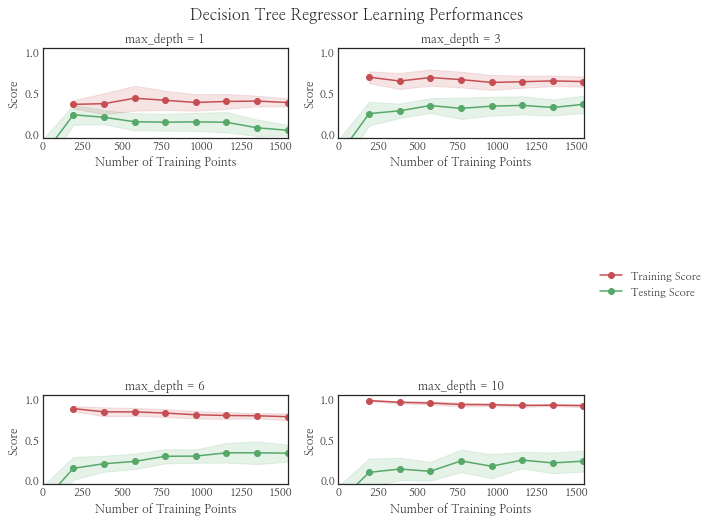

In [137]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(X, y)

### Question  - Learning the Data¶

 -Choose one of the graphs above and state the maximum depth for the model.
 -What happens to the score of the training curve as more training points are added? What about the testing curve?
 -Would having more training points benefit the model?

    #### Hint: Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary? Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

#### Answer: 

I choose the graph with max_depth=3.

As the number of training points increase, the error in training set increases by a small margin, so the training score reduces. On the other hand, the error in testing set decreases by a small margin, so the testing score increases.

Eventually, for large enough training points, training and testing curve will converge to a score of about 0.8 .

Having more training points may make the model more accurate as the distance between training and testing curve could reduce further. However, since training and testing curve almost seem to have converged already we cannot expect significant improvements.

#### Additional Answer:

###### max_depth = 1 (High Bias Scenario)


 ######  -We can see how the testing score (green line) increases with the number of observations.

 ######  *However, the testing score only increases to approximately 0.4, a low score.

 ######  *This indicates how the model does not generalize well for new, unseen, data.


 - Moreover, the training score (red line) decreases with the number of observations.
   
   *Also, the training score decreases to a very low score of approximately 0.4.

   *This indicates how the model does not seem to fit the data well.

   *Thus, we can say this model is facing a high bias problem. Consequently, having more training points would not 
   benefit the model as the model is underfitting the dataset. Instead, one should increase the model complexity      to better fit the dataset.

 - Morever, the teting score has reached a plateau suggesting the model may not improve from adding more training points.


  - This is an extension explaining the rest of the depths for completeness. I have summarized everything instead of   writing in full sentences.



##### max_depth = 3 (Ideal Scenario)


 
 - 1.Testing score (green line) increases with training points
 
   Reaches ~0.8

   High score
 
   Generalize well

 
 - 2.Training score (red line) decreases slightly with training points

   Reachers ~0.8

   High score

   Fit dataset well


 
 - 3.There seems to be no high bias or high variance problem

     Model fits and generalizes well

     Ideal

     More training points should help it become an even more ideal model!



##### max_depth = 10 (High Variance Scenario)



 
 - 1.Testing score (green line) increases with training points

   -Reaches ~0.7

   -Not so high score

   -Does not generalize well

 
 
 - 2.Training score (red line) barely decreases with training points

   -At ~1.0

    -Almost perfect score

    -Overfitting dataset

 
 
 - 3.There seems to be a high variance problem

    Overfitting





##### max_depth = 6 (Slightly High Variance Scenario)




  - 1.Testing score (green line) increases with training points


  
  - 2.Reaches ~0.75

    Not so high score

    Does not generalize well

  
  - 3.Training score (red line) decreases slightly with training points


    At ~0.9

    High score

    Overfitting dataset

 
 - 4.There seems to be a high variance problem

   Overfitting

   More training points might help


    This is getting close to the ideal scenario!


#### GradientBoostingRegressor

/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with les

/home/kaysuh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/kaysuh/visuals.py:117: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


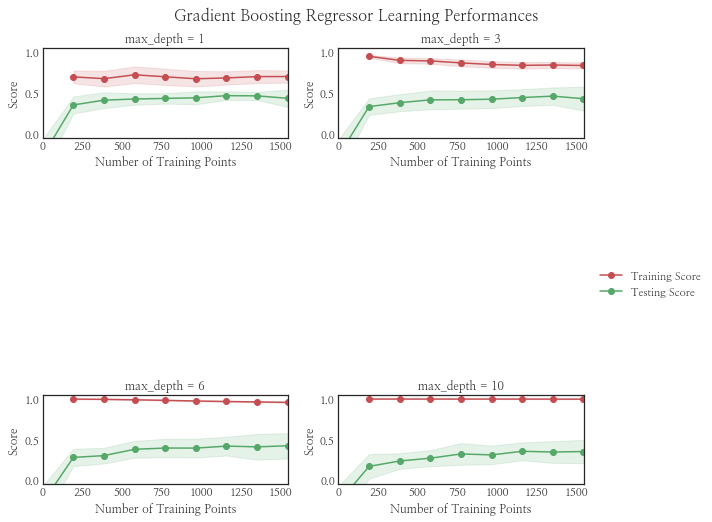

In [138]:
vs.ModelLearning_GBR(X, y)

### Complexity Curves¶

The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

##### Run the code cell below and use this graph to answer the following two questions .

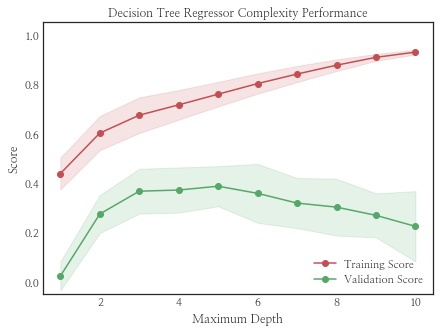

In [139]:
vs.ModelComplexity(X_train, y_train)

#### Question  - Bias-Variance Tradeoff
 
    - When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?
 
    - How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

 ##### Hint: High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

##### Answer:

When the model is trained with a maximum depth of 1, it has low training score as well as validation score. This is a clear indicator for high bias. 

When the model is trained with a maximum depth of 10, it has high training score but relatively low validation score. The gap between these scores is huge. This means that model suffers from high variance.

#### Question  - Best-Guess Optimal Model

  - Which maximum depth do you think results in a model that best generalizes to unseen data?
 
   -What intuition lead you to this answer?

   
 ##### Hint: 
 
 Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

 ##### Answer:

I think a maximum depth of 3 would result in a model that best generalizes to unseen data. At this depth the training and validation scores are very close and have relatively high value between 0.6 and 0.7. 

If the maximum depth is less than 3, training and validation scores are quite low which means model has high bias. 

On the other hand, if the maximum depth is more, training score is high but the validation score is relatively low which means model has high variance.

[ 편향-분산 트레이드오프 ] 

​

● 편향(Bias)

: 데이터 또는 학습 모형이 특정 방향으로 치우쳐져 있는 정도. 높을수록 안좋음

​

● 분산(Variance)

: 데이터 또는 학습모형이 넓은 범위에 걸쳐 분포되어있는 정도. 높을수록 안좋음

​


편향과 분산은 Trade-off 관계에 있다.



##### GradientBoostingRegressor

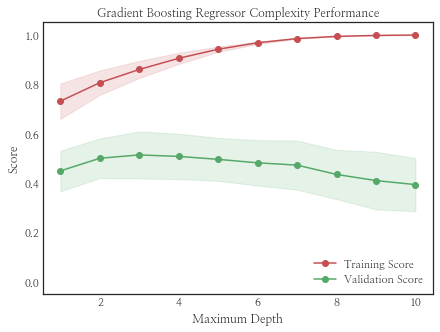

In [140]:
vs.ModelComplexity_GBR(X_train, y_train)


### Evaluating Model Performance
 
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from fit_model.

#### Question  - Grid Search

-What is the grid search technique?

-How it can be applied to optimize a learning algorithm?

##### Hint: 

When explaining the Grid Search technique, be sure to touch upon why it is used, what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

#### Answer:

Grid search is a technique of tuning hyperparameters for a learning algorithm to find an optimal set of hyperparameters for training a model. 

For example, let's say we want to train a SVM and we choose to tune two hyperparameters namely Kernel and gamma. Assume Kernel can have two possible values - "Linear", "Polynomial" and gamma can have any float values. In order to limit the number of combinations we choose to test gamma for 0.1, 1 and 10. Then we have a total of 6 combinations of hyperparameters with which we can train our model. Then we methodically build different versions of the model for each combination and measure its accuracy. We want to select the combination that has the best accuracy. These possible combinations or the search space can be thought of as grid and searching through these combinations to find the best one is called grid search.


#### Question - Cross-Validation

-What is the k-fold cross-validation training technique?

-What benefit does this technique provide for grid search when optimizing a model?


##### Hint: 

When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon using a particular subset of data for training or testing and how k-fold cv could help alleviate that. You can refer to the docs for your answer.

#### Answer: 

Testing of a model is done by separating a data between training and testing set. This is not always ideal as we seem to be throwing away some data that could be useful for training our algorithm. K-fold cross validation is a resampling procedure used to evaluate machine learining models on a limited data sample.

This procedure splits the data into k bins. For each bin we take it as a hold out or test data set. We take the remaining k-1 groups as training data set. Then we fit the model on the training data set and evaluate it on the test data set. This process is repeated once for each bin and we keep track of the model score for each iteration. Finally, mean of all scores is reported as the overall score of the model.

Although grid search automates the hyperparameter tuning for selecting the best model, it could result in models being tuned to only a specific subset of data if we do not use cross validation. For example, if a dataset has some pattern or certain ordering, grid search would only perform tuning on the same suset of trainng data. With k-fold cross validation and shuffling, we can eliminate this issue by using the entire dataset to train and test the model allowing grid search to tune the hyperparameters across all data points.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the decision tree algorithm. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the 'max_depth' parameter for the decision tree. The 'max_depth' parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called supervised learning algorithms.

In addition, you will find your implementation is using ShuffleSplit() for an alternative form of cross-validation (see the 'cv_sets' variable). While it is not the K-Fold cross-validation technique you describe in Question 8, this type of cross-validation technique is just as useful!. The ShuffleSplit() implementation below will create 10 ('n_splits') shuffled sets, and for each shuffle, 20% ('test_size') of the data will be used as the validation set. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the fit_model function in the code cell below, you will need to implement the following:

-Use DecisionTreeRegressor from sklearn.tree to create a decision tree regressor object.
 
    *Assign this object to the 'regressor' variable.

-Create a dictionary for 'max_depth' with the values from 1 to 10, and assign this to the 'params' variable.

-Use make_scorer from sklearn.metrics to create a scoring function object.

 *Pass the performance_metric function as a parameter to the object.
 
 *Assign this scoring function to the 'scoring_fnc' variable.

-Use GridSearchCV from sklearn.model_selection to create a grid search object.
  
    *Pass the variables 'regressor', 'params', 'scoring_fnc', and 'cv_sets' as parameters to the object.

    *Assign the GridSearchCV object to the 'grid' variable.

In [141]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit, train_test_split

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions¶

Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the target variable. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

#### Question  - Optimal Model

-What maximum depth does the optimal model have? How does this result compare to your guess in Question above?

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [142]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 5 for the optimal model.


#### Hint: 
The answer comes from the output of the code snipped above.

#### Answer:

The optimal model has maximum depth of 5. My guess for maximum depth in Question above was 3. It was a close guess. By looking at the model complexity graph, for a maximum depth of 5, model has a slightly better training score and almost same validation score as compared to maximum depth of 3. So the gap between training score and validation score for maximum depth 5 is a slightly higher but using grid search cross validation we can see that it generalizes better.

### GradientBoostingRegressor Pipeline

In [143]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
import itertools

# Set a pipeline with Scaler and Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor(max_depth= 8, max_features=6, min_samples_split=200, n_estimators=100,random_state=42))

])
    

In [144]:
# Train the model
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regressor',
                 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                                           init=None, learning_rate=0.1,
                                           loss='ls', max_depth=8,
                                           max_features=6, max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=200,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                           n_iter_no_change=None,
                                           presort='auto', random_state=42,
  

In [145]:
# Get score with train data
pipeline.score(X_train, y_train)

0.889804979309615

In [146]:
# Get score for evaluation
pipeline.score(X_test,y_test)

0.46365188686271763

## Predict Hammer price 

부산 당리4차혜성 6층 601호

영도 영선동반도보라 108동 24층 2402호

하단 가락타운 204동 11층 1101호


In [147]:
# Produce a matrix for client data
client_data = [[0.545455, 11, 6, 1, 0, 108.81, 63.42, 3906.0, 0], # 부산 당리4차혜성 6층 601호

               [0.960000, 25, 24, 1, 0, 59.70, 18.07, 23691, 0], # 영도 영선동반도보라 108동 24층 2402호

               [0.687500, 16, 11, 1, 0, 138.56, 59.64, 125210.8, 0]] # 하단 가락타운 204동 11층 1101호


# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    
    print("Predicted Hammer price for Client {}'s home: KRW{:,.2f}".format(i+1, price))

Predicted Hammer price for Client 1's home: KRW586,217,572.77
Predicted Hammer price for Client 2's home: KRW265,894,087.63
Predicted Hammer price for Client 3's home: KRW799,611,316.03


In [148]:
client_data_2 = {
    # EAST
    '당리 혜성': [0.545455, 11, 6, 1, 0, 108.81, 63.42, 3906.0, 0],
    '영도 반도보라': [0.960000, 25, 24, 1, 0, 59.70, 18.07, 23691, 0],
    '하단 가락타운': [0.687500, 16, 11, 1, 0, 138.56, 59.64, 125210.8, 0]
    
}

In [149]:
al_predicts = {}
for client, value in client_data_2.items():
    price = pipeline.predict([value])[0]
    al_predicts[client]=price
    print(al_predicts)

{'당리 혜성': 616685598.3106307}
{'당리 혜성': 616685598.3106307, '영도 반도보라': 257677083.24680144}
{'당리 혜성': 616685598.3106307, '영도 반도보라': 257677083.24680144, '하단 가락타운': 779735988.6743594}


### Sensitivity

An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted.

Run the code cell below to run the fit_model function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.

In [150]:
vs.PredictTrials(X, y, fit_model, client_data)

Trial 1: KRW535,529,075.46
Trial 2: KRW552,400,976.10
Trial 3: KRW552,402,669.65
Trial 4: KRW551,300,565.93
Trial 5: KRW587,387,974.54
Trial 6: KRW579,126,861.70
Trial 7: KRW578,254,729.74
Trial 8: KRW580,438,720.26
Trial 9: KRW720,014,422.45
Trial 10: KRW552,891,270.18

Range in prices: KRW184,485,346.99
